In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import os
import warnings
warnings.filterwarnings("ignore")

## 영양소 - 식품군 관련 시각화

In [2]:
df = pd.read_csv('all_nutrients.csv', encoding='utf-8-sig')

In [3]:
# 키워드로 나눈 식품군
food_groups = {
        'Alcoholic beverage':['맥주','소주','막걸리','보드카',],
        'Animal fat':['크림','치즈','마요네즈','크러스트','버터','식용유','콤비네이션','모짜렐라','피자',
                      '쇠기름','마유','체다'
                     ],
        'Animal product':['해장','소세지','쥐포','베이컨','치킨','윙','핫도그','만두','단백질','소시지',
                         '비엔나','햄','버거','후랑크','맥스봉','미트볼','리얼팜','후렌치후라이','데리야끼',
                          '제육','런천미트','커틀릿','타코야끼','리챔','프로틴','곰탕','설렁탕','돈까스',
                          '부대찌개','오곡','알탕','꿔바','육개장','동그랑',
                         ],
        'Aquatic Products':['어묵','맛살',
            
        ],
        'Cereals':['밥','스파게티','빵','잣','잡곡','귀리','바게트','곡물','감자','통밀','라멘','쫄면',
                  '국수','소면','파스타','냉면','떡','짬뽕','소바','라면','선식','메밀면','보리','쌀',
                  '참깨','콘푸라이트','당면','비빔면','짜장면','코코볼','또띠아','카스테라','밀가루',
                  '리소토','브래드','우동','포테이토','현미','사발면','브레드','크로와상','오트','시리얼',
                   '크로아상','흑밀','죽','곡식','호밀','소보루','인절미','누룽지','그라놀라','미숫',
                   '기장','백설기','전병','잡채','누들','사리','오므라이스','리조또','면','푸레이크',
                   '수제비','베이글',
                  ],
        'Egg':['계란', '달걀','에그','오므라이스'],
        'Fish, Sea food':['병어','장어','갈비','임연수','황태','바지락','올갱이','홍합','회','굴',
                         '해물', '골뱅이', '쥐치','농어','문어','멍게','새우','연어','참치','한치',
                         '낙지','소라','오징어','홍어','가자미','북어','동태','조기','게','고등어',
                         '도미','민어','붕어','전어','추어','대구','슈림프','쉬림프','횟','갈치',
                         '다금바리','조개','해삼','대게','부각','노래미','잉어','우럭','복어','전복',
                         '다슬기','전갱이','아구','가재','다랑어','톳','쏘가리','꽁치','돗돔','꼬막',
                          '방어','명태','미꾸라지','달팽이','능성어','돌돔','감성돔','도화돔','독돔','범돔',
                          '뿔돔','샛돔','어름돔','옥돔','육동가리돔','자리돔','참돔','호박돔','황돔','각시돔',
                          '빙어','고래','미역','고둥','삼치','가물치','꼴뚜기','정어리','거북이','크릴',
                          '숭어','우렁','주꾸미','새치','산천어','메기','다시마','줄돔','쌍둥가리',
                          '아귀','매생이','거봉','은어','상어','멸치','도다리','향어','가리비',
                          '청어','송어',
                         ],
        'Apples':['매작과','사과','오렌지','자몽','포도','귤','주스','베리','키위','자몽','과일',
                 '멜론','수박','석류','딸기','잼','쨈','복숭아','바나나','레몬','망고','살구',
                 '파인애플','단감','오디','토마토','과즙','깔리만시','두리안','유자','매실','참외',
                  '복분자','칼라만시','자두','연시','자두','애플','깔라만시','대추','아보카도',
                  '한라봉',
                 ],
        'Meat':['꿩', '닭','돼지','소고기','갈비','오리','등심','모래집','바비큐','불고기','스테이크',
               '와규','삼겹','쇠고기','돈코츠','돈육','족발','한우','차슈','송아지','메추리','소 부산물',
                '삼계','토끼','거위','바베큐','안심','양고기'
               ],
        'Milk':['우유','요구르트','요거트','밀크','yogurt','라떼','요플레','엑티비아','두유','요거'
               '유산균','연유','야쿠르트','불가리스','파스퇴르','유산균','요거'
               ], # 요거트
        'Miscellaneous':['분유'],
        'Offals':['순대','내장', '곱창',],
        'Oil Crop':['목화','코코넛','해바라기','옥수수','팝콘','들깨','수수',], # 해바라기유 빼고
        'Pulse':['된장', '콩', '팥','메주','두유','두부','녹두','청국장',],
        'Spices':['고추장','된장','소스','간장','고추','파프리카','카레','비빔장','쌈장','춘장','막장',
                  '후추','고춧',
                 ],
        'Starchy Roots':['더덕', '무','고구마','도라지','홍삼','인삼','산삼','당근','뿌리','토란','와사비','고구',
                         '장마','연근',
                        ],
        'Stimulants':['초콜릿','녹차','초코','커피','에스프레소','그린 티','콜드브루','마끼아또','메리카노',
                      '완두','카페','티백','모카','카푸치노','칸타타','마키아토','홍차','블랙티','초콜렛',
                     '마키아또','그린티','헤이즐','파르페','카모마일','쵸코','아포가토','콜라','맥심','얼그레이티',
                      '우롱티','원두','얼 그레이','허브 티','한차',
                     ],
        'Sugar':['설탕','캔디','흑당','쿠키','젤리','달고나','쇼콜라','케이크','케익','과자','까페',
                '오레오','누가바','푸딩','양갱','다이제','스낵','카카오','사탕','비스킷','티라미수',
                '캬라멜','아이스티','빙수','브라우니','카라멜','올리고당','메로나','쿠크다스','소프트콘',
                 '말랑카우','추파','콜라','마카롱','슈가','와플','약과','티라미스','젤라또','자유시간',
                 '빼빼로','옥동자','샤베트','길리안','비스켓','사이다','펩시','코코아','소다','바닐라',
                 '시럽','쁘띠','제티','스위트','쵸콜','제리','롯데샌드','에이드','쵸키','꿀','베이비슈',
                 '구미베어','가나마일드','껌','에이드','츄파','구미베어','크런치','석기시대','수정과',
                 '맛동산','한과','구구콘','칙촉','죠스바','가나','식혜'
                ], # 무설탕 빼고
        'Treenuts':['호두','넛트','너트','아몬드','월넛','웨하스','견과','도토리','피스타치오넛',],
        'Vegetable Oil':['올리브유','올리브오일','올리브 오일','해바라기유','카놀라','오일','알리오','들기름',
                        '참기름','참맛기름','유채유','올리오','마아가린',
                        ],
        'Vegetable':['시래기', '쑥', '김치', '나물', '송이','약초','깻잎','버섯','야채','피클','호박',
                    '마늘','양파','채소','고춧잎','배추','두릅','샐러드','가지','달래','브로컬리','오이',
                    '죽순','녹즙','솔잎','시금치','삼채','브로콜리','셀러리','상추','선인장','부추',
                    '고사리','씀바귀','잎','알로에','명이','비트',
                    ],
        'Vegetal Products':['와인','포도주','칵테일','식초'], # 포도주스 빼고
}

In [4]:
# 모든 영양소
df.columns[8:]

Index(['에너지', '수분', '단백질', '지방', '탄수화물', '총당류', '자당', '포도당', '과당', '유당',
       ...
       '오메가 6 지방산', '트랜스 지방산', '트랜스 올레산(18:1(n-9)t)', '트랜스 리놀레산 (18:2t)',
       '트랜스 리놀렌산(18:3t)', '냉산가용성물질', '총 불포화지방산', '식염상당량', '회분', '카페인'],
      dtype='object', length=151)

In [ ]:
from collections import defaultdict

def visualize_nutrients(df, number_of_food, mode='all'):
    """ 영양소마다 식품군에 대한 분포 확인하는 함수입니다.

    Args:
        df (pandas.DataFrame): 영양소 dataframe
        number_of_food (int): 영양소 함량이 높은 순서로 확인하고 싶은 식품 개수
        mode (str): 'all' - 모든 영양소에 대한 시각화 확인
                    'others' - 중요 영양소만 시각화 확인

    Returns:
        None: 시각화만 존재
    """    
    df_ = df.copy()
    dic_list = []
    if mode == 'all': # 모든 영양소 시각화
        loop = df_.columns[8:]
    else: # 항 바이러스 영양소만 시각화
        loop = ['셀레늄', '비타민 D(D2+D3)', '비타민 D2', '비타민 D3','아연','비타민 C','나이아신','나이아신(NE))']
    for stand in loop:
        dict = defaultdict(lambda :0)
        for i in df_[['식품명',stand]].sort_values(stand, ascending=False).iloc[:number_of_food,:]['식품명']:
            for j in food_groups:
                check = False
                for k in food_groups[j]:
                    if k in i:
                        check=True
                        dict[j] += 1
                        break
        print(stand)
        sns.barplot(x=list(dict.keys()), y=list(dict.values()))
        dic_list.append([stand, sorted(dict, key=lambda x:x.items[1])])
        plt.xticks(rotation=45)
        plt.show()
    return dic_list

에너지


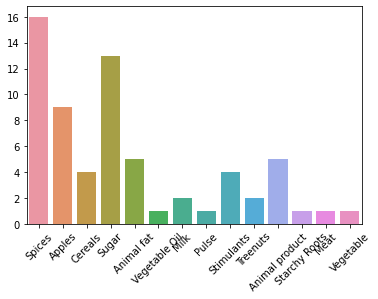

수분


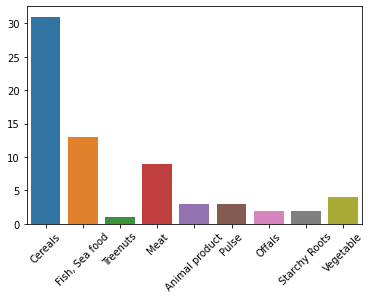

단백질


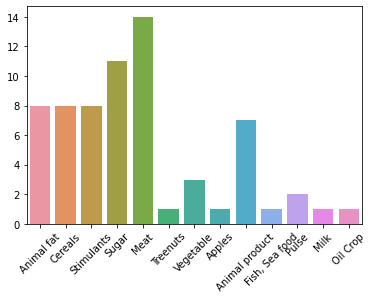

지방


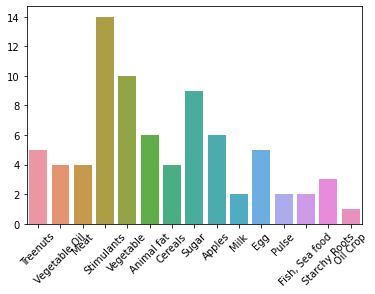

탄수화물


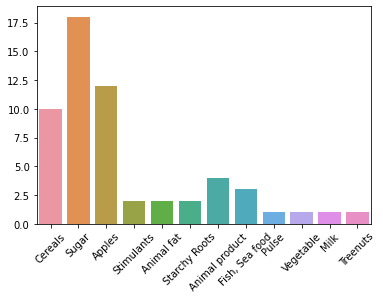

총당류


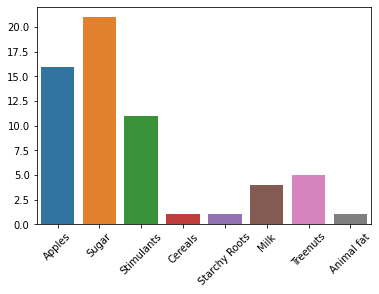

자당


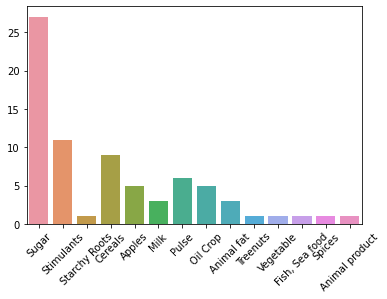

포도당


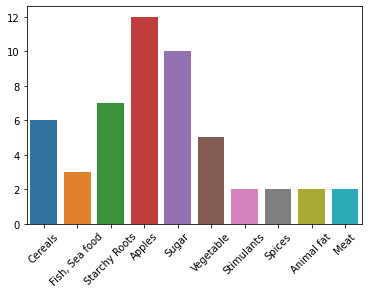

과당


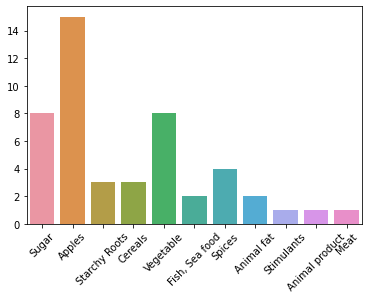

유당


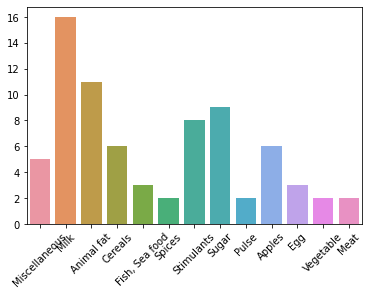

맥아당


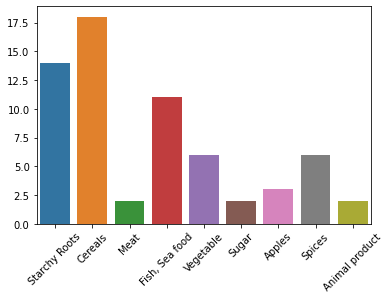

갈락토오스


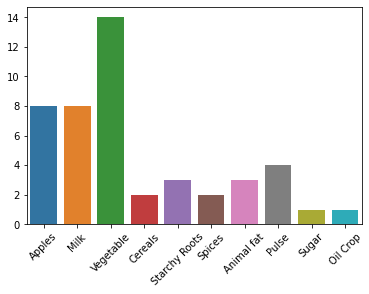

당알콜


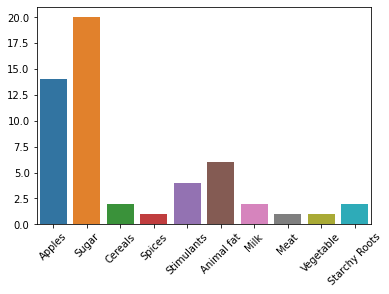

에리스리톨


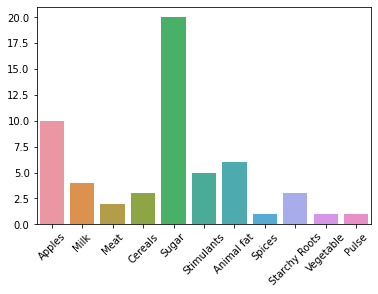

총 식이섬유


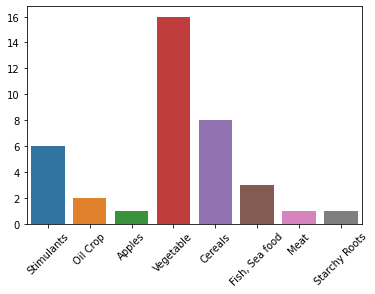

수용성 식이섬유


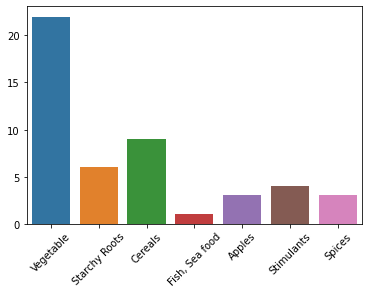

불용성 식이섬유


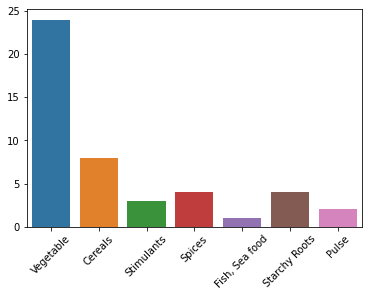

칼슘


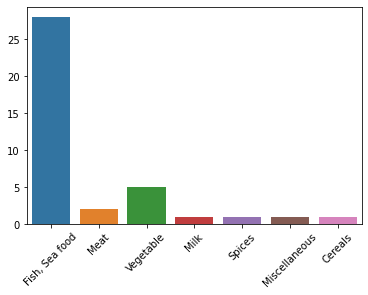

철


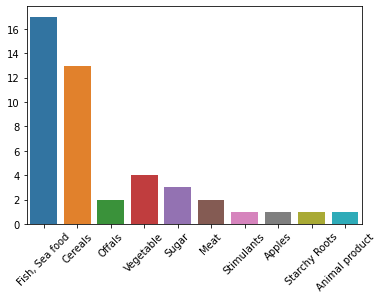

마그네슘


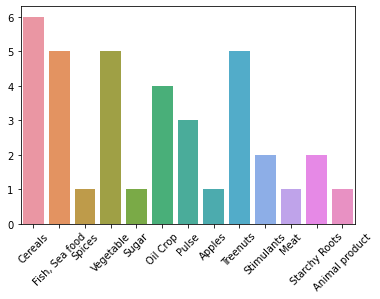

인


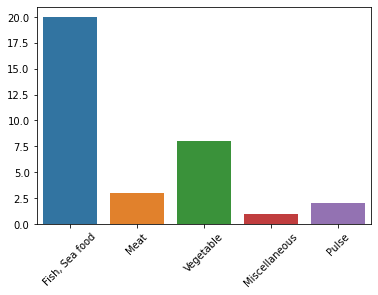

칼륨


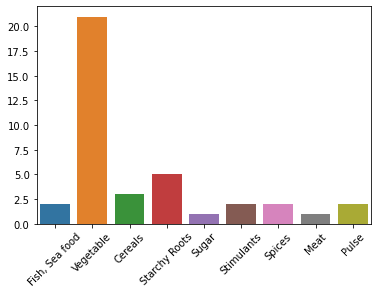

나트륨


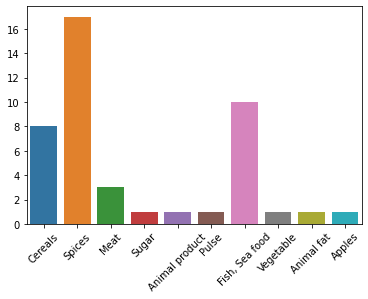

아연


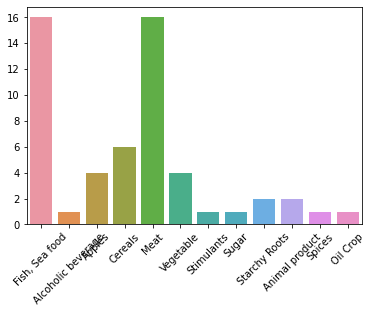

구리


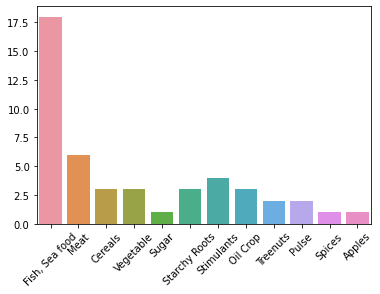

망간


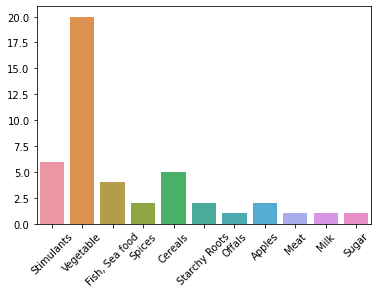

셀레늄


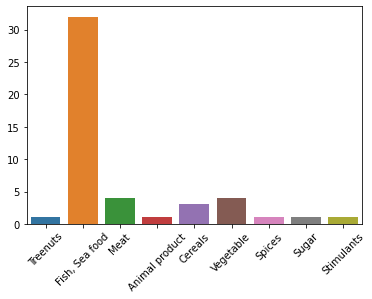

몰리브덴


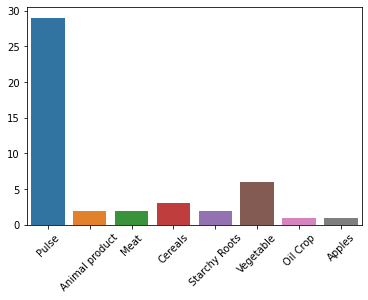

요오드


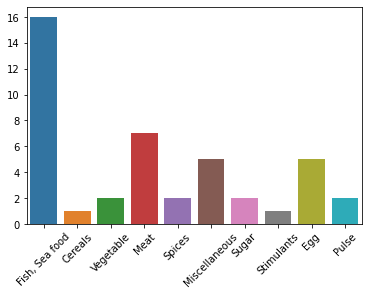

염소


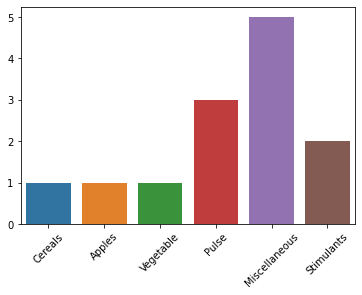

비타민 A


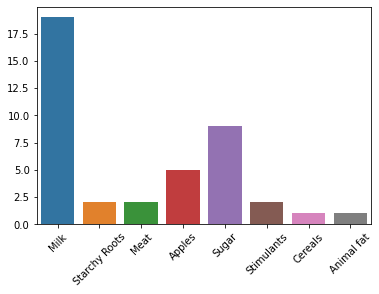

비타민 A(RE)


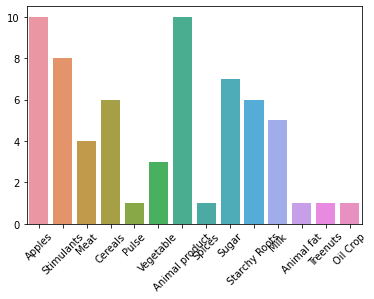

레티놀


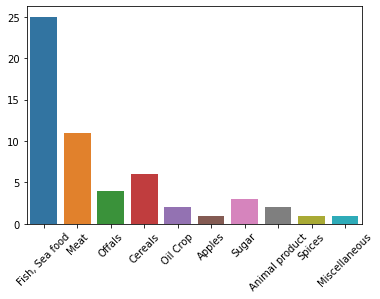

베타카로틴


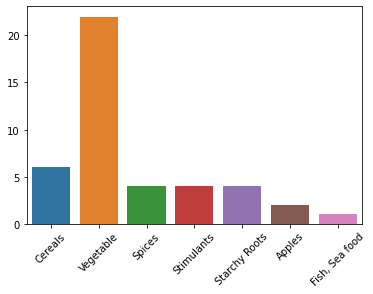

레티놀A효능


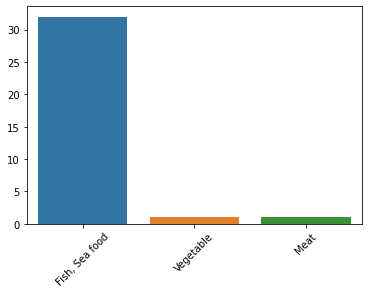

비타민 D(D2+D3)


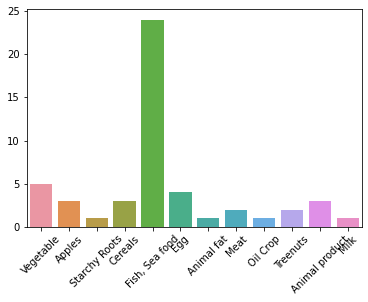

비타민 D2


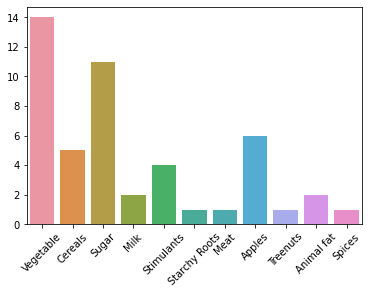

비타민 D3


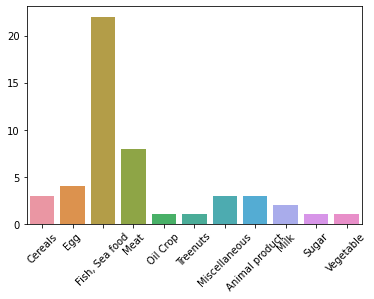

비타민 D1


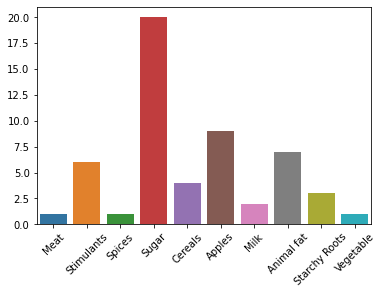

비타민 E


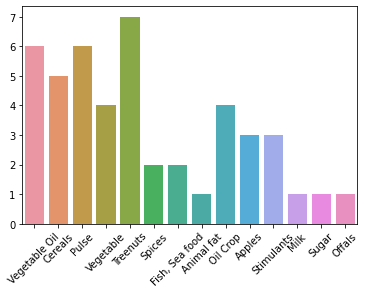

비타민 E(α-TE)


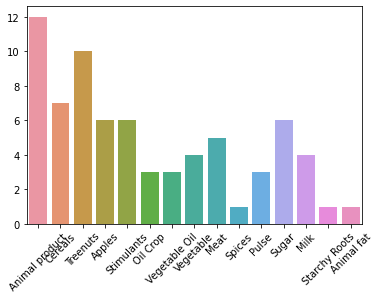

알파 토코페롤


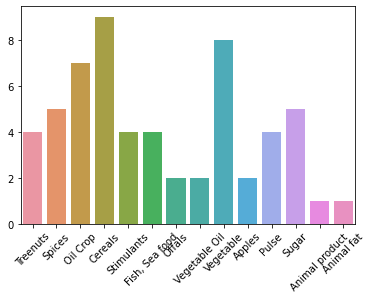

베타 토코페롤


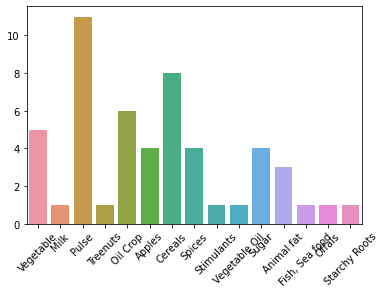

감마 토코페롤


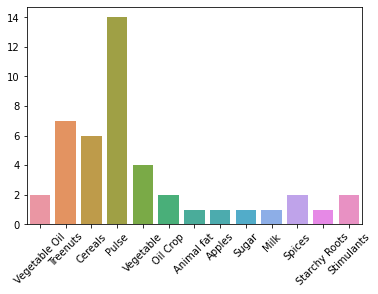

델타 토코페롤


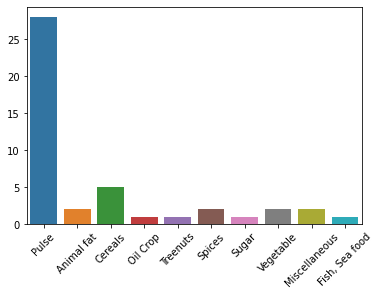

알파 토코트리에놀


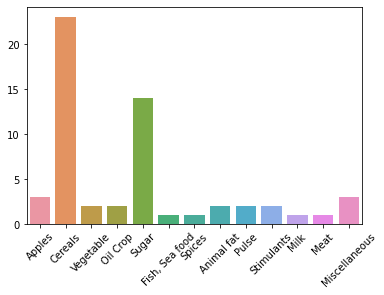

베타 토코트리에놀


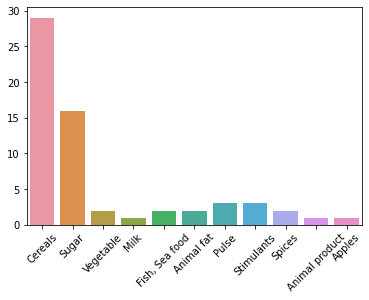

감마 토코트리에놀


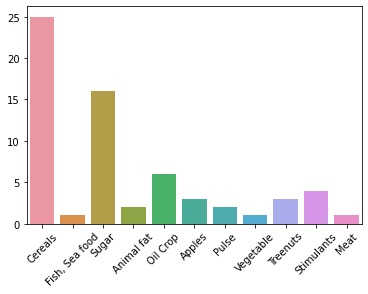

델타 토코트리에놀


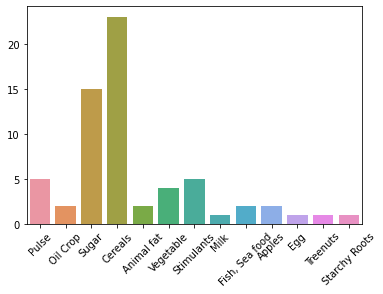

토코페롤


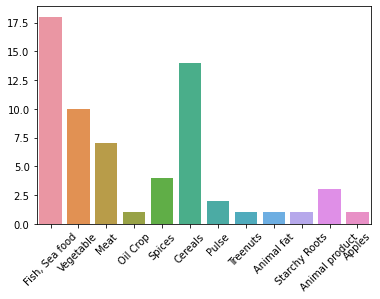

토코트리에놀


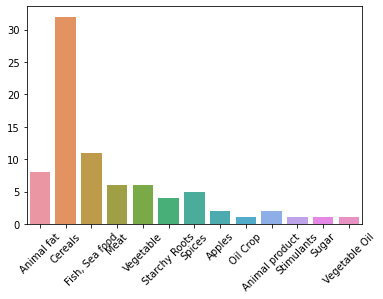

비타민 K


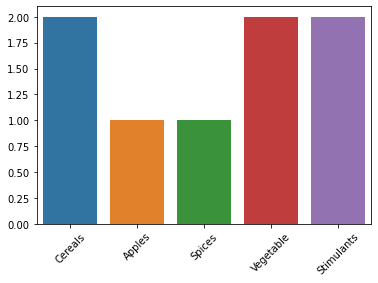

비타민 K1


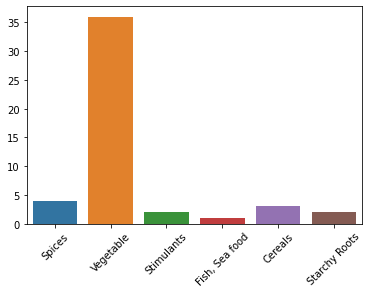

비타민 K2


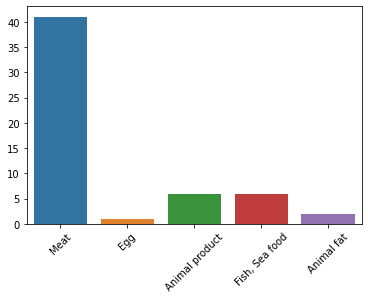

비타민 B1


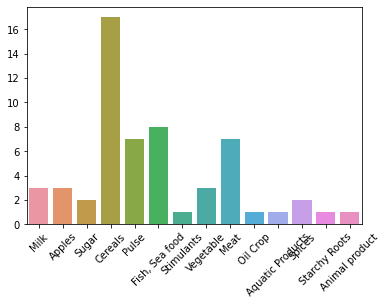

비타민 B2


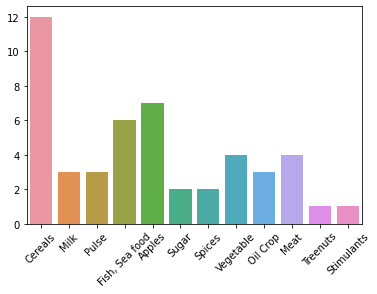

나이아신


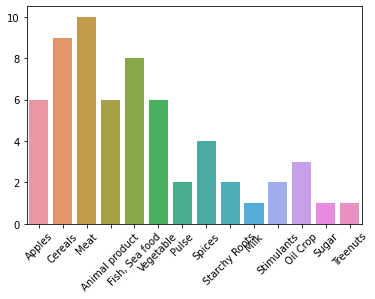

나이아신(NE))


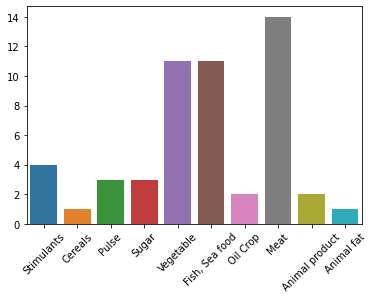

니코틴산


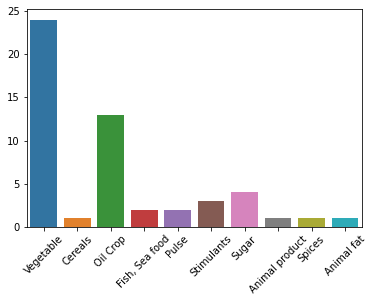

니코틴아마이드


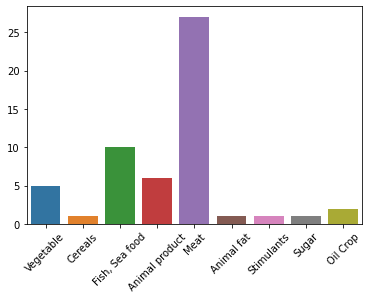

판토텐산


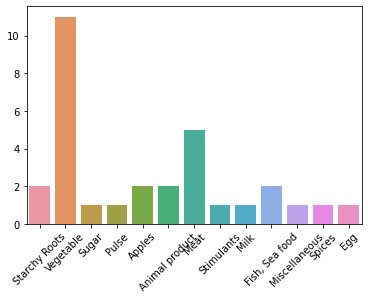

비타민 B6


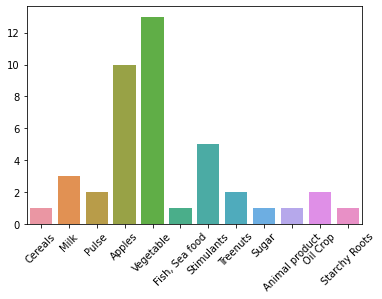

피리독신


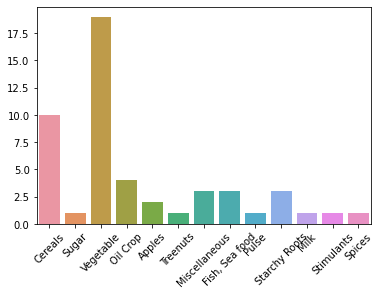

비오틴


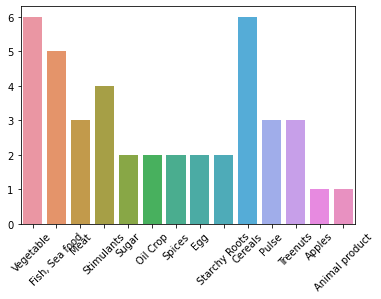

엽산(DFE)


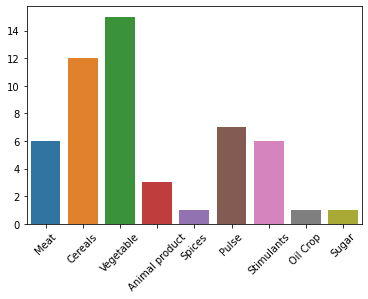

엽산 - 천연 엽산


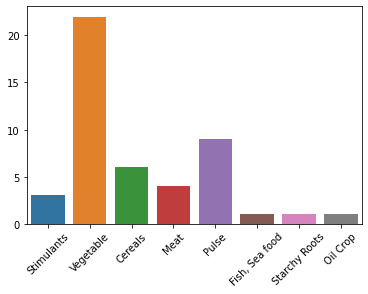

엽산 - 합성 엽산


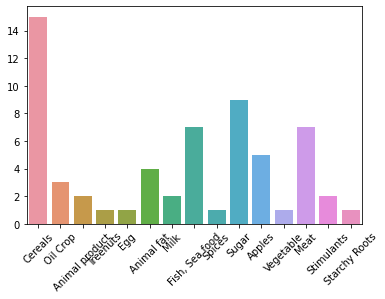

비타민 B12


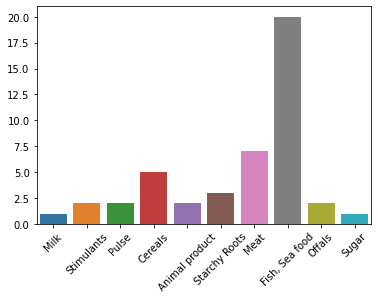

비타민 C


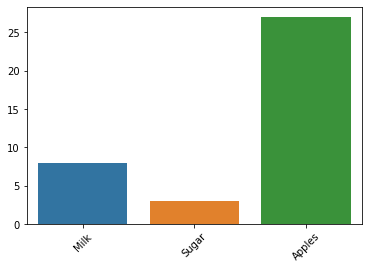

콜린


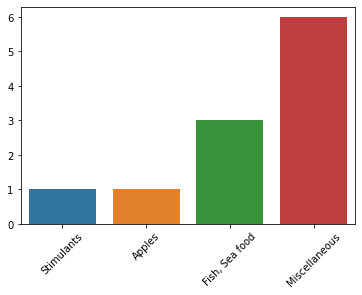

총 아미노산


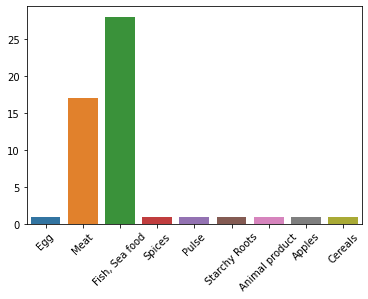

필수 아미노산


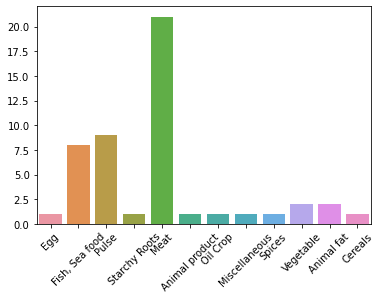

이소류신


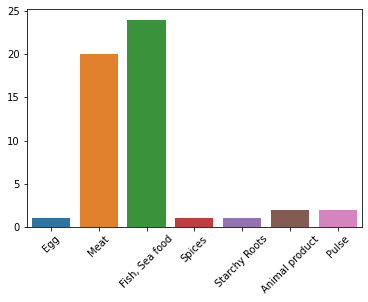

류신


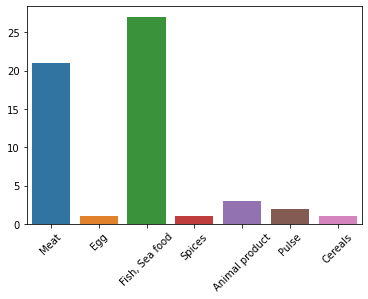

라이신


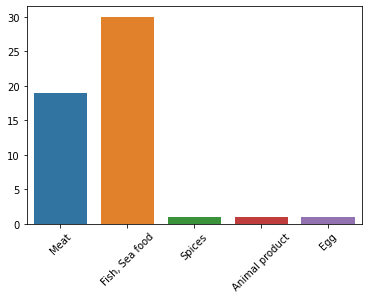

메티오닌


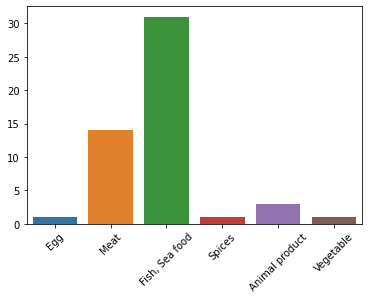

페닐알라닌


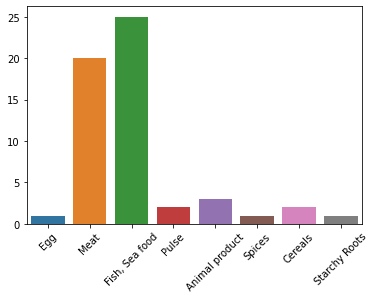

트레오닌


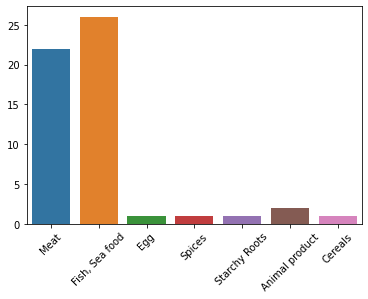

트립토판


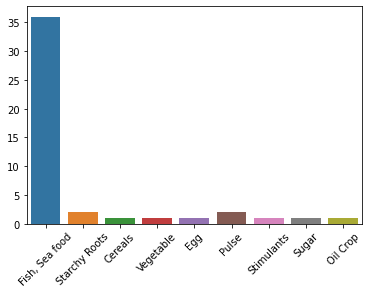

발린


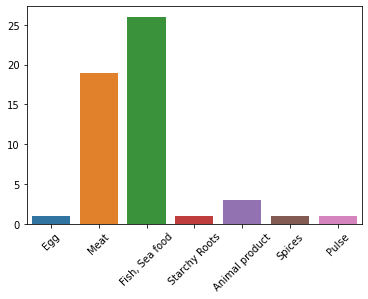

히스티딘


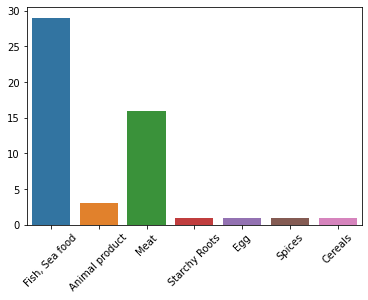

아르기닌


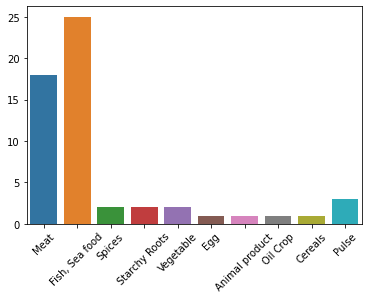

비필수 아미노산


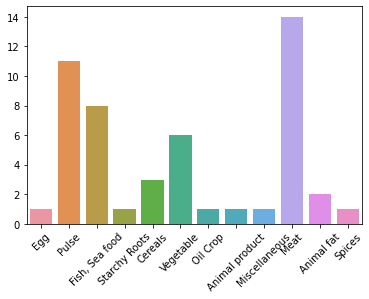

티로신


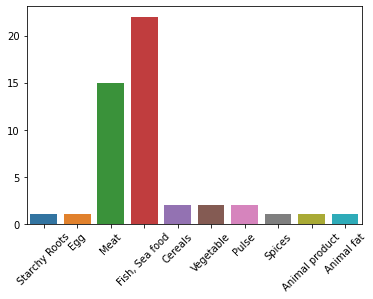

시스테인


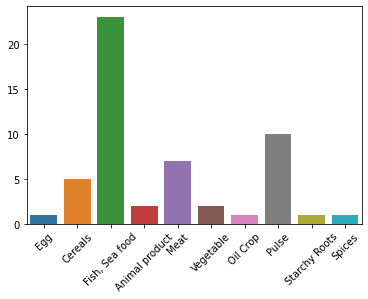

알라닌


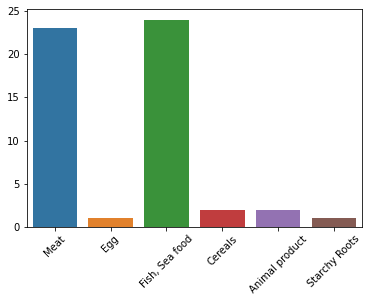

아스파르트산


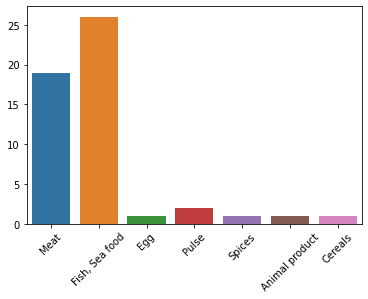

글루탐산


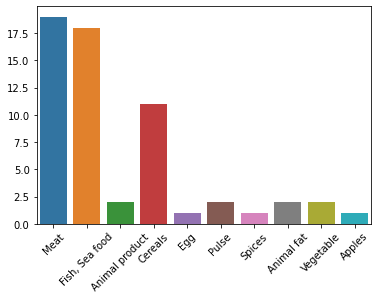

글리신


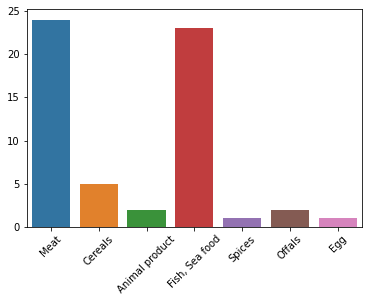

프롤린


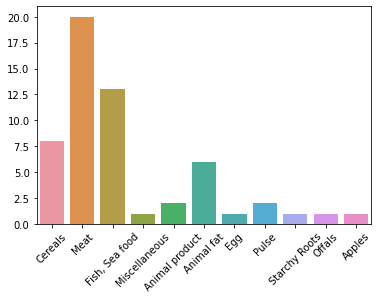

세린


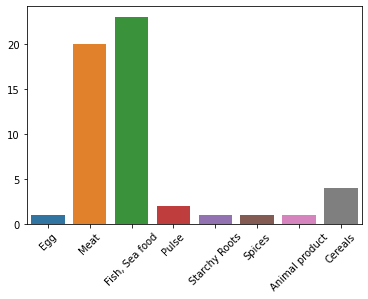

타우린


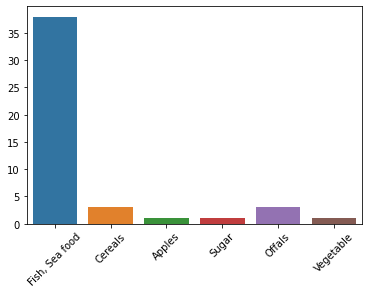

글리신 베타인 


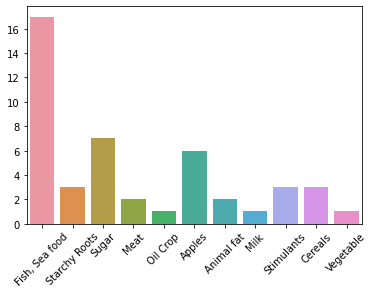

호마린


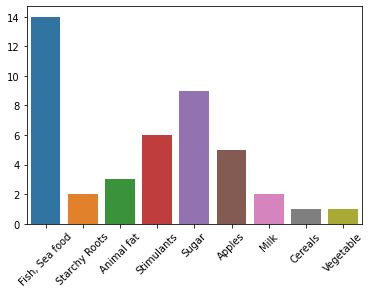

트리고넬린


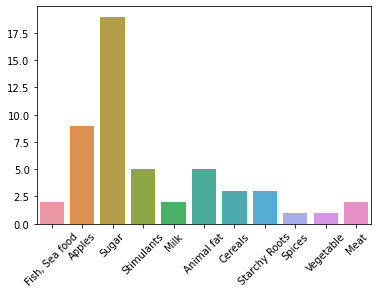

리보핵산


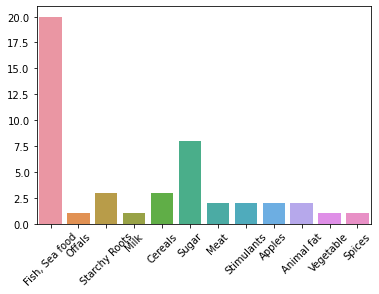

데옥시리보핵산


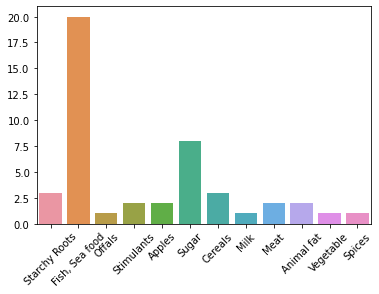

콜레스테롤


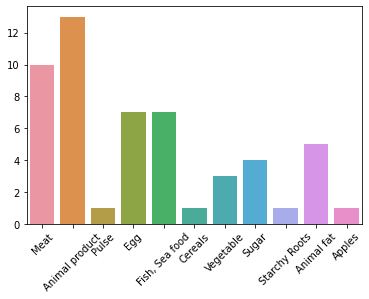

총 지방산


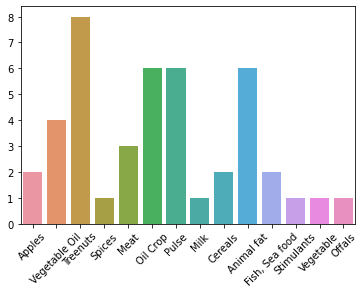

총 필수 지방산


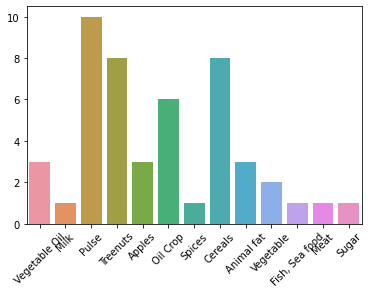

총 포화 지방산


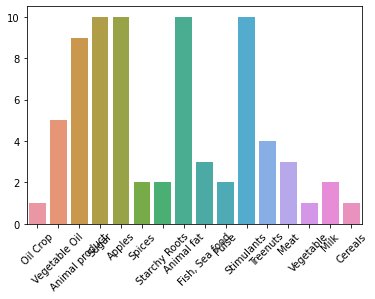

부티르산(4:0)


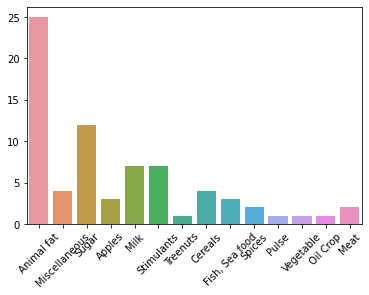

카프로산(6:0)


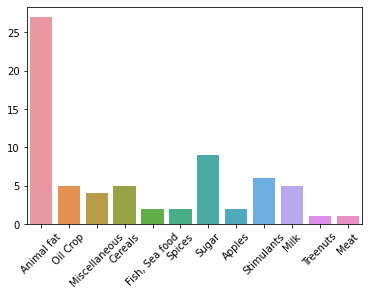

카프릴산(8:0)


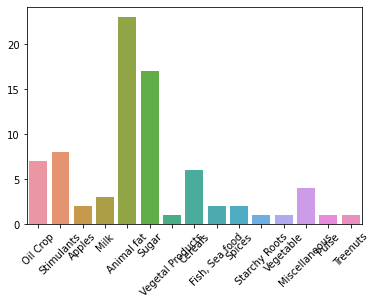

카프르산(10:0)


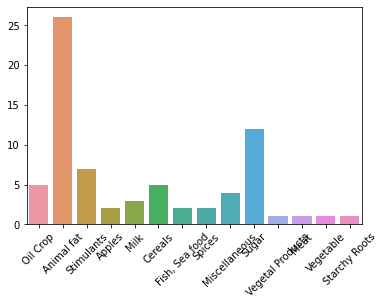

라우르산(12:0)


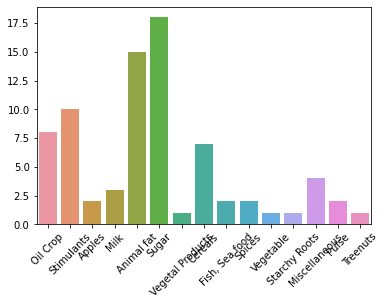

트라이데칸산(13:0)


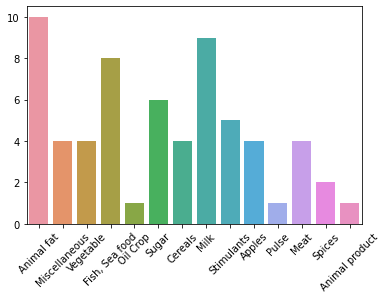

미리스트산(14:0)


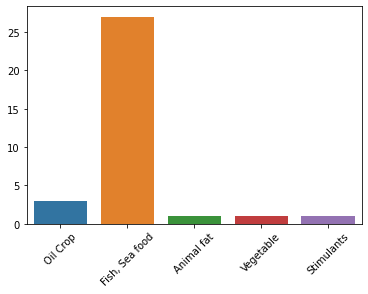

펜타데칸산(15:0)


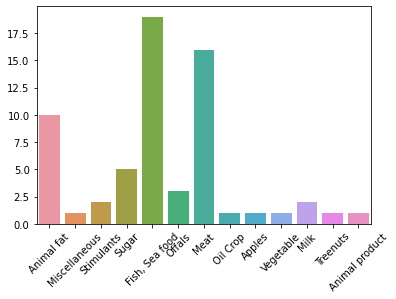

팔미트산(16:0)


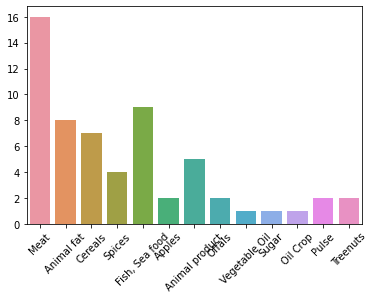

헵타데칸산(17:0)


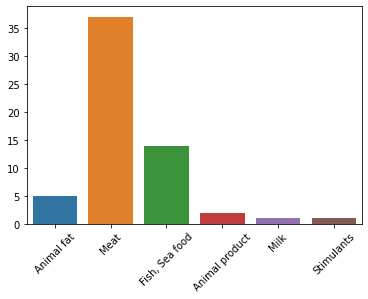

스테아르산(18:0)


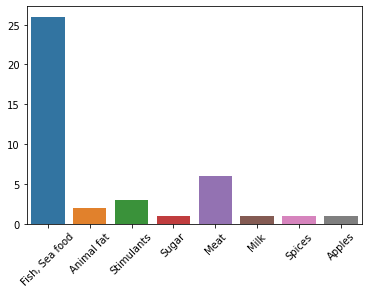

아라키드산(20:0)


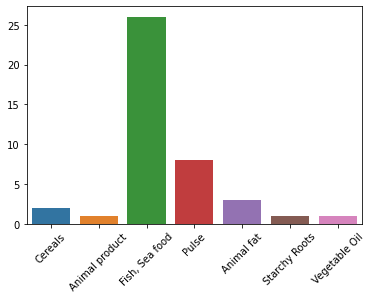

헨에이코산산(21:0)


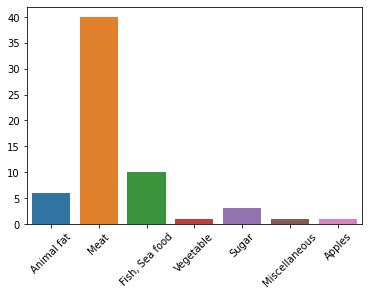

베헨산(22:0)


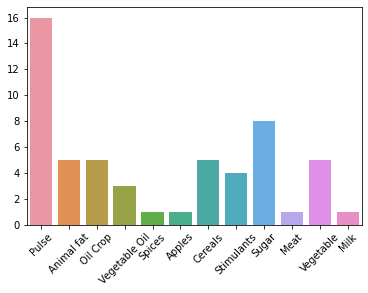

트리코산산(23:0)


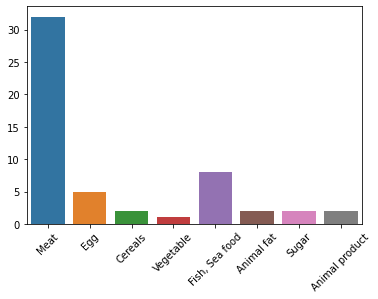

리그노세르산(24:0)


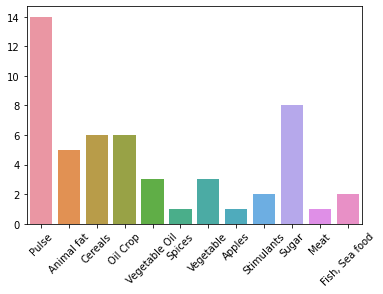

총 단일 불포화지방산


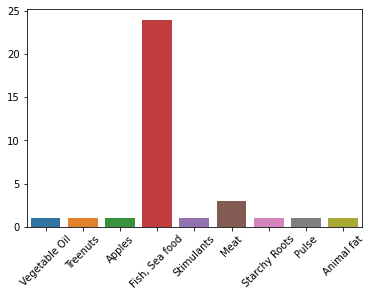

미리스톨레산(14:1)


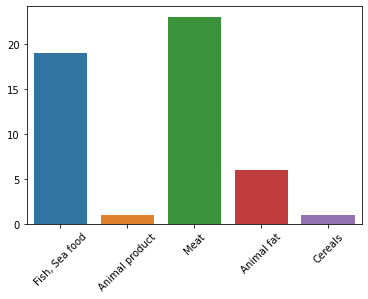

팔미톨레산(16:1)


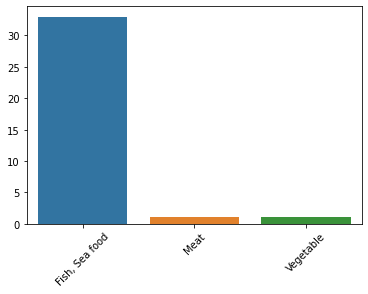

헵타데센산(17:1)


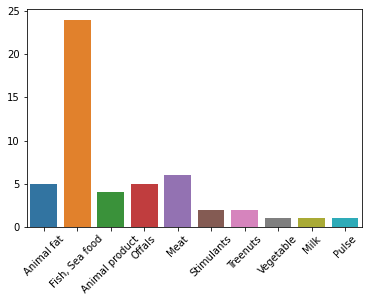

올레산(18:1(n-9))


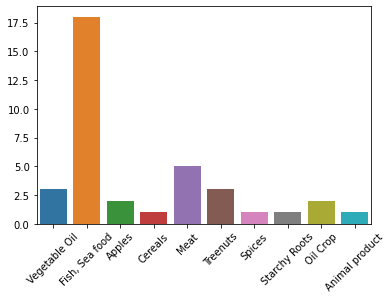

박센산(18:1(n-7))


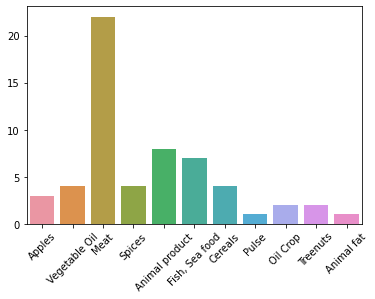

가돌레산(20:1)


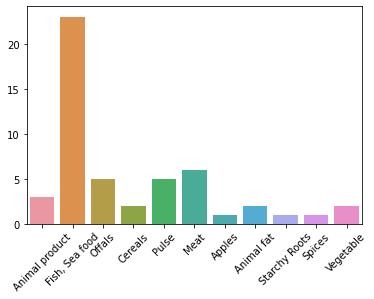

에루크산(22:1)


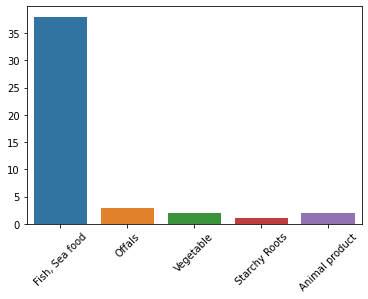

네르본산(24:1)


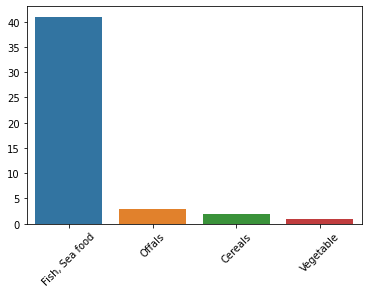

총 다중 불포화지방산


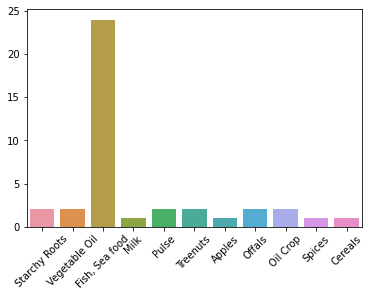

리놀레산(18:2(n-6)c)


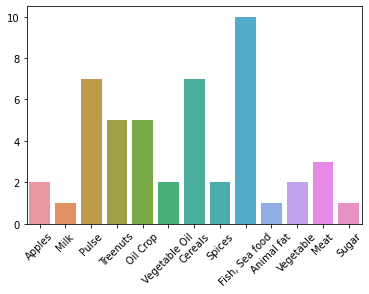

알파 리놀렌산(18:3(n-3))


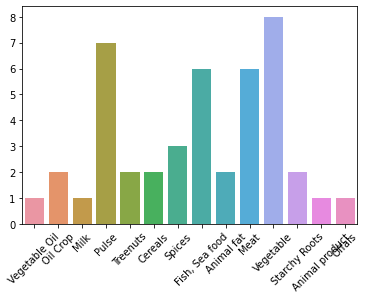

감마 리놀렌산(18:3(n-6))


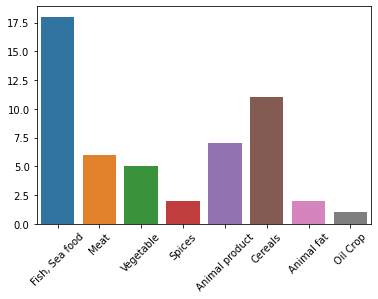

에이코사디에노산(20:2(n-6))


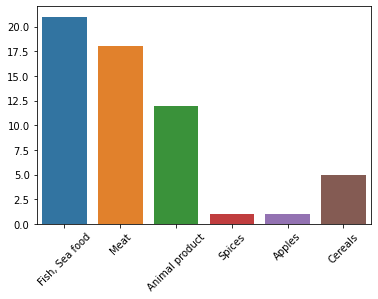

에이코사트리에노산(20:3(n-3))


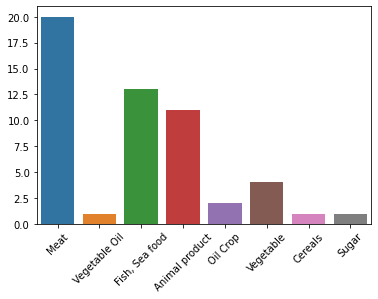

에이코사트리에노산(20:3(n-6))


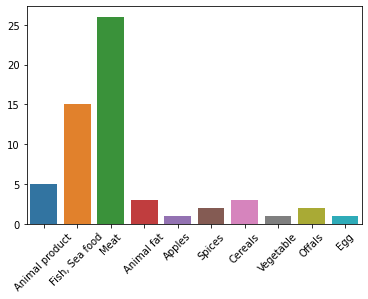

아라키돈산(20:4(n-6))


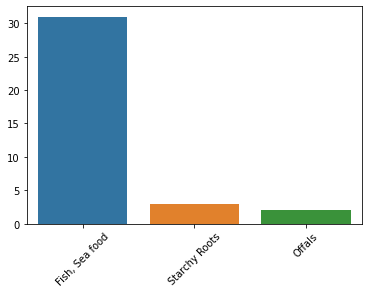

에이코사테트라에노산(20:4(n-3))


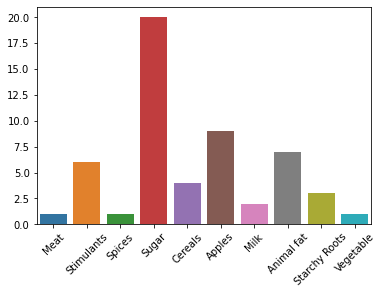

에이코사펜타에노산(20:5(n-3))


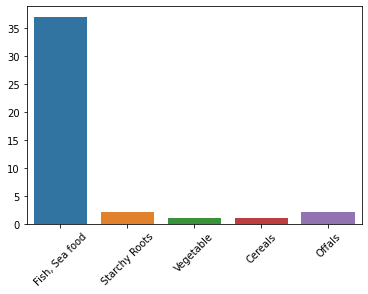

도코사디에노산(22:2)


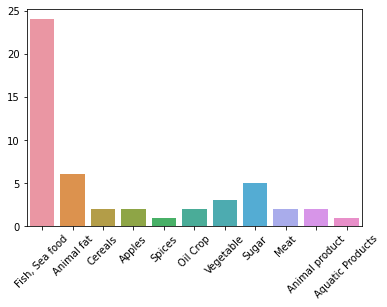

도코사펜타에노산(22:5(n-3))


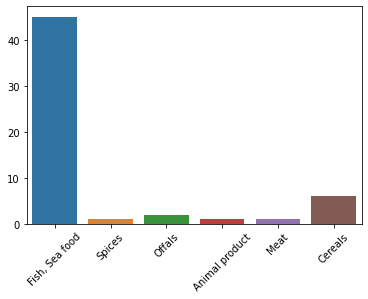

도코사헥사에노산(22:6(n-3))


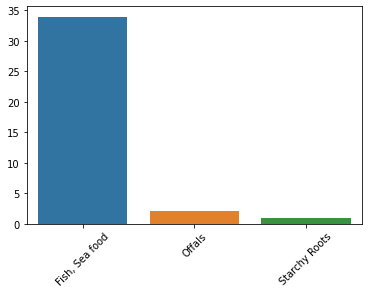

EPA와 DHA의 합


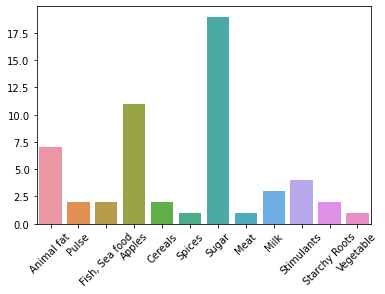

오메가 3 지방산


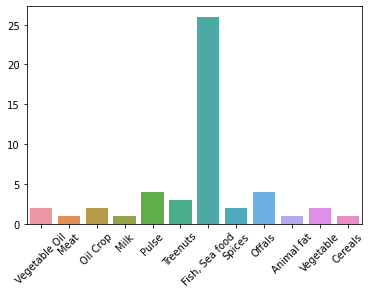

오메가 6 지방산


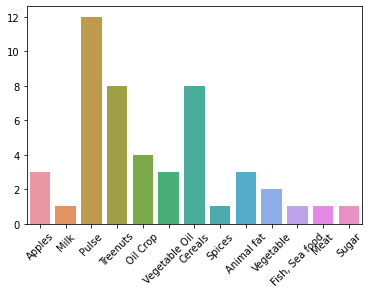

트랜스 지방산


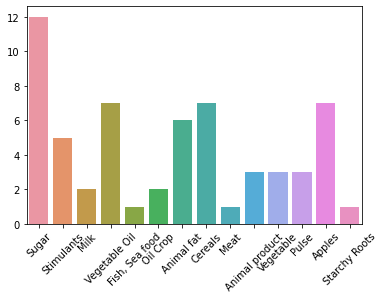

트랜스 올레산(18:1(n-9)t)


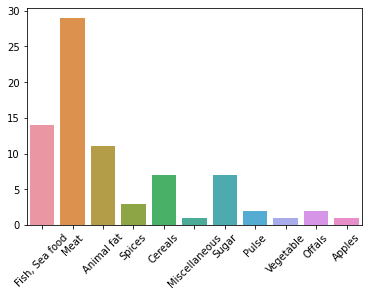

트랜스 리놀레산 (18:2t)


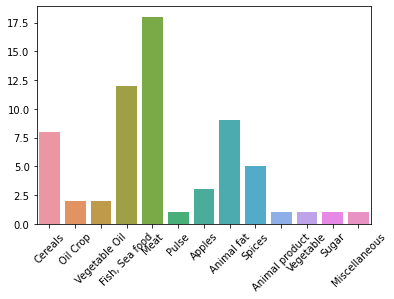

트랜스 리놀렌산(18:3t)


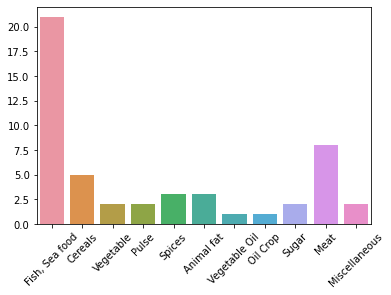

냉산가용성물질


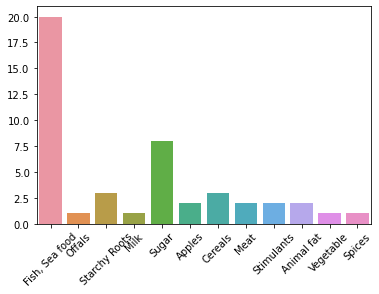

총 불포화지방산


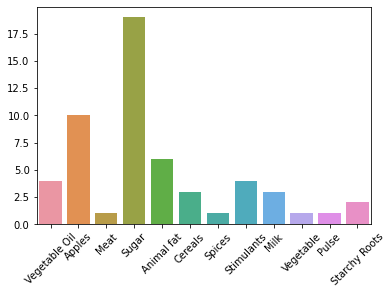

식염상당량


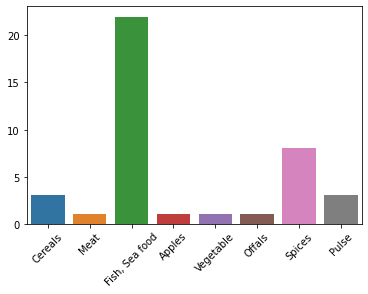

회분


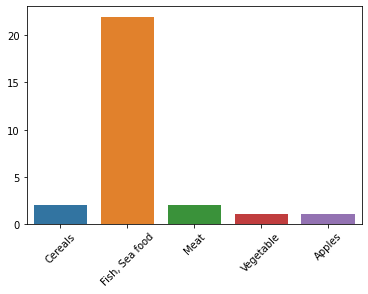

카페인


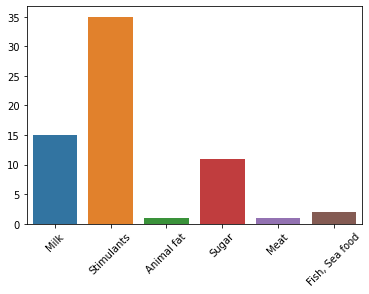

In [14]:
dic1 = visualize_nutrients(df, 50, mode='all')

In [15]:
dic1

[['에너지',
  defaultdict(<function __main__.visualize_nutrients.<locals>.<lambda>()>,
              {'Spices': 16,
               'Apples': 9,
               'Cereals': 4,
               'Sugar': 13,
               'Animal fat': 5,
               'Vegetable Oil': 1,
               'Milk': 2,
               'Pulse': 1,
               'Stimulants': 4,
               'Treenuts': 2,
               'Animal product': 5,
               'Starchy Roots': 1,
               'Meat': 1,
               'Vegetable': 1})],
 ['수분',
  defaultdict(<function __main__.visualize_nutrients.<locals>.<lambda>()>,
              {'Cereals': 31,
               'Fish, Sea food': 13,
               'Treenuts': 1,
               'Meat': 9,
               'Animal product': 3,
               'Pulse': 3,
               'Offals': 2,
               'Starchy Roots': 2,
               'Vegetable': 4})],
 ['단백질',
  defaultdict(<function __main__.visualize_nutrients.<locals>.<lambda>()>,
              {'Animal fat': 8,
       

In [16]:
for i in dic1:
    if i[0] in ['셀레늄', '비타민 D(D2+D3)', '비타민 D2', '비타민 D3','아연','비타민 C','나이아신','나이아신(NE))']:
        print(dic1[i].items()[:3])

TypeError: list indices must be integers or slices, not list

In [26]:
# 영양소 함량 직접 눈으로 확인
column = '셀레늄'
df[['식품명',column]].sort_values(column, ascending=False).iloc[:50,:]

,식품명,셀레늄
7686,"브라질너트, 말린것",0.001917
8284,퉁퉁마디환(함초환),0.000669
6321,고등어구이,0.000636
9839,"겨자, 가루",0.000529
6350,참치머리구이,0.000367
8735,"돼지 부산물, 신장, 삶은것",0.000311
17,게국지,0.000298
6322,고등어석쇠구이,0.000286
4,도미구이,0.000281
6328,돼지갈비구이,0.000258


## 증상 관련 시각화

In [9]:
df = pd.read_csv('cleaned_symptom2.csv')

#### 증상 개수에 대한 확진 비율

In [10]:
df['sum_symptom'] = df.loc[:,'cough':'head_ache'].sum(axis=1)

In [11]:
def visualize_number_symptom():
    """
        증상 개수에 대한 음성, 양성 사람 수 시각화
        graph1 : 확진자 중 증상 개수 분포
        graph2 : 전체 확진자 에 대한 증상 분포
        graph3 : 전체 비확진자에 대한 증상 분포
        graph4 : 증상 개수에 따라 확진자가 될 확률
        
    """
    df_ = df.copy()
    
    dict1 = dict()
    dict2 = dict()
    dict3 = dict()
    dict4 = dict()

    confirmed_number = df_.corona_result.sum()
    for key in range(6):

        value1 = (df_[df_.corona_result ==1].sum_symptom == key).sum() # 확진자중 증상개수가 key개인 명수
        value2 = (df_[df_.corona_result ==0].sum_symptom == key).sum()
        if key in dict1.keys():
            dict1[key] += value1
        else:
            dict1[key] = value1
            
        if key in dict2.keys():
            dict2[key] += (value1/((df_.corona_result==1).sum()))*100
        else:
            dict2[key] = (value1/((df_.corona_result==1).sum()))*100

        if key in dict3.keys():
            dict3[key] += (value2/((df_.corona_result==0).sum()))*100
        else:
            dict3[key] = (value2/((df_.corona_result==0).sum()))*100

        if key in dict4.keys():
            dict4[key] += (df_[df_.sum_symptom == key].corona_result).sum()/(df_.sum_symptom == key).sum()
        else:
            dict4[key] = (df_[df_.sum_symptom == key].corona_result).sum()/(df_.sum_symptom == key).sum()

    sns.barplot(x=list(dict1.keys()), y=list(dict1.values()))
    plt.title('Number of Confirmed')
    plt.xlabel('Number of Symptoms')
    plt.ylabel('Number of Confirmed')
    plt.show()

    sns.barplot(x=list(dict2.keys()), y=list(dict2.values()))
    plt.title('Rate of Confirmed')
    plt.xlabel('Number of Symptoms')
    plt.ylabel('Number of Not Confirmed')
    plt.show()

    sns.barplot(x=list(dict3.keys()), y=list(dict3.values()))
    plt.title('Rate of Confirmed')
    plt.xlabel('Number of Symptoms')
    plt.ylabel('Number of Not Confirmed')
    plt.show()

    sns.barplot(x=list(dict4.keys()), y=list(dict4.values()))
    plt.title('Rate of Confirmed')
    plt.xlabel('Number of Symptoms')
    plt.ylabel('Number of Not Confirmed')
    plt.show()


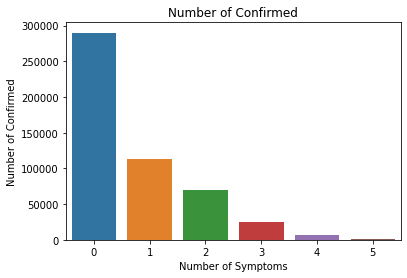

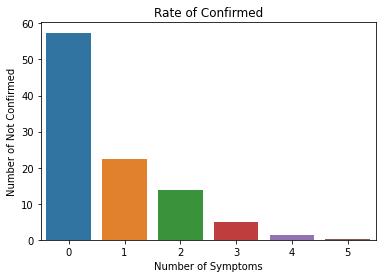

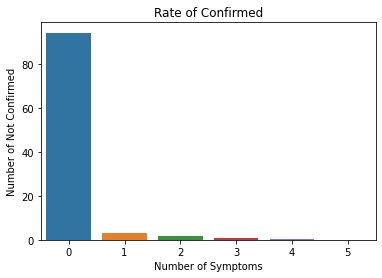

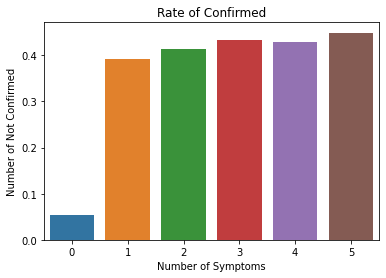

In [12]:
visualize_number_symptom()